# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as cal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
# Read in data
data = pd.read_csv('AnimalCrossing_Villagers.csv')
del data['phrase']
del data['full_id']
del data['url']
del data['song']
data.head()

,row_n,id,name,gender,species,birthday,personality
0,2,admiral,Admiral,male,bird,January,cranky
1,3,agent-s,Agent S,female,squirrel,July,peppy
2,4,agnes,Agnes,female,pig,April,uchi
3,6,al,Al,male,gorilla,October,lazy
4,7,alfonso,Alfonso,male,alligator,June,lazy


In [4]:
# Perform your data wrangling and descriptive stats to help
data.dtypes

row_n           int64
id             object
name           object
gender         object
species        object
birthday       object
personality    object
dtype: object

In [59]:
data['gendernum'] = np.where(data['gender'] == 'male', 0, 1)
data.head()

,row_n,id,name,gender,species,birthday,personality,gendernum,birthdaynum
0,2,admiral,Admiral,male,bird,January,cranky,0,1
1,3,agent-s,Agent S,female,squirrel,July,peppy,1,0
2,4,agnes,Agnes,female,pig,April,uchi,1,0
3,6,al,Al,male,gorilla,October,lazy,0,0
4,7,alfonso,Alfonso,male,alligator,June,lazy,0,0


In [60]:
mapping_personality = {'cranky': 1, 'peppy': 2, 'uchi': 3, 'lazy': 4, 'normal': 5, 'snooty': 6, 'jock': 7, 'smug': 8}
mapping_birthday = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data.replace({'personality': mapping_personality, 'birthday': mapping_birthday})

,row_n,id,name,gender,species,birthday,personality,gendernum,birthdaynum
0,2,admiral,Admiral,male,bird,1,1,0,1
1,3,agent-s,Agent S,female,squirrel,7,2,1,0
2,4,agnes,Agnes,female,pig,4,3,1,0
3,6,al,Al,male,gorilla,10,4,0,0
4,7,alfonso,Alfonso,male,alligator,6,4,0,0
...,...,...,...,...,...,...,...,...,...
386,475,winnie,Winnie,female,horse,1,2,1,1
387,477,wolfgang,Wolfgang,male,wolf,11,1,0,0
388,480,yuka,Yuka,female,koala,7,6,1,0
389,481,zell,Zell,male,deer,6,8,0,0


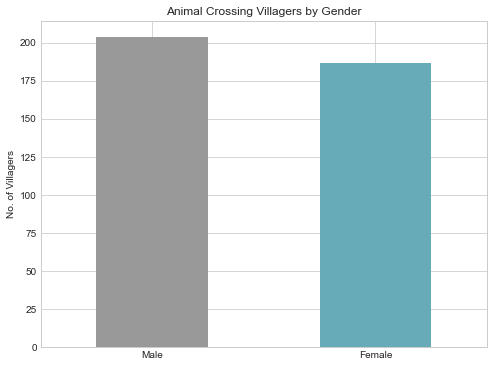

In [12]:
# Visualize your data
AC = data['gendernum'].value_counts().plot(figsize=(8, 6), kind='bar', color=['#999999', '#68abb8'], width=0.5)

AC.set_xticklabels(['Male', 'Female'], rotation=0)
AC.set_title('Animal Crossing Villagers by Gender')
AC.set_ylabel('No. of Villagers');

Caption: This is a figure about....

In [38]:
# AC = data['birthday'].value_counts().head(30).plot(kind='barh', figsize=(12,8),color=['#6cc08b'])
# # AC = data['gendernum'].value_counts().head(30).plot(kind='barh', figsize=(12,8))
# AC.set_title('Animal Crossing Villages by Birthday Month')
# AC.set_xlabel('No. of Villagers')
# AC.set_ylabel('Birthday Month')


In [75]:
bygender = data.groupby('birthday')['gender'].value_counts().unstack()
bygender

gender,female,male
birthday,,
April,18,11
August,14,22
December,13,21
February,17,12
January,18,14
July,14,21
June,15,18
March,19,14
May,15,16


In [76]:
male = bygender['male']
female = bygender['female']

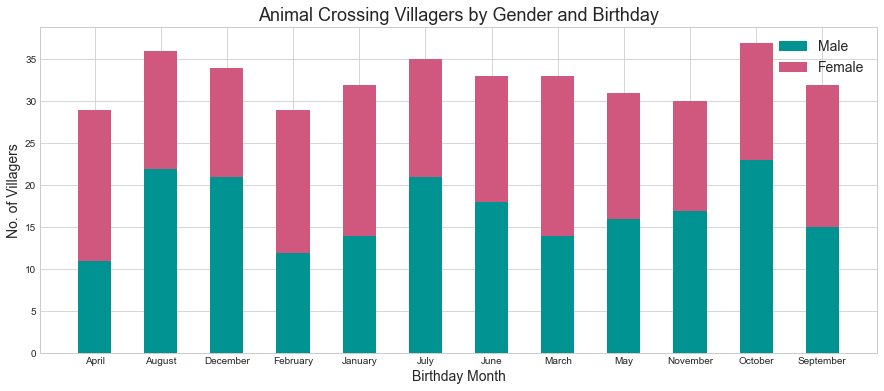

In [80]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)

ax.bar(male.index, male, color='#009392', width=0.5, label='Male')
ax.bar(female.index, female, bottom= male, color='#d0587e', width=0.5, label='Female')
ax.set_title('Animal Crossing Villagers by Gender and Birthday', fontsize=18)
ax.set_xlabel('Birthday Month', fontsize=14)
ax.set_ylabel('No. of Villagers', fontsize=14)
ax.legend(fontsize=14);
plt.savefig('ACVillagers by Gender & Birthday.png')